In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

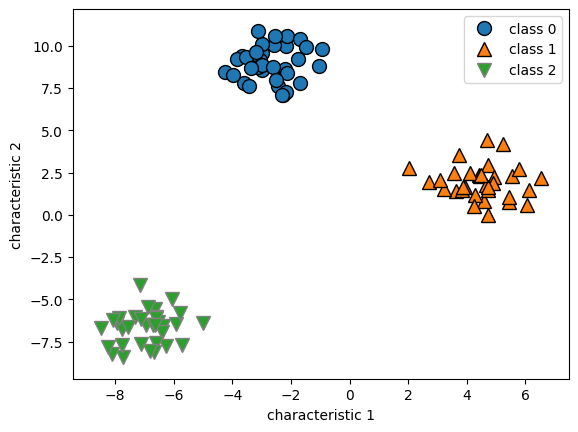

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y= make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("characteristic 1")
plt.ylabel("characteristic 2")
plt.legend(["class 0","class 1","class 2"])

In [3]:
linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


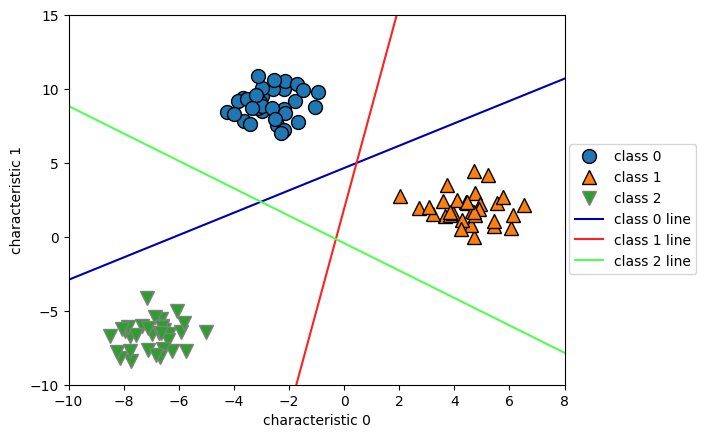

In [4]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("characteristic 0")
plt.ylabel("characteristic 1")
plt.legend(['class 0','class 1','class 2','class 0 line','class 1 line','class 2 line'], loc=(1.01,0.3))

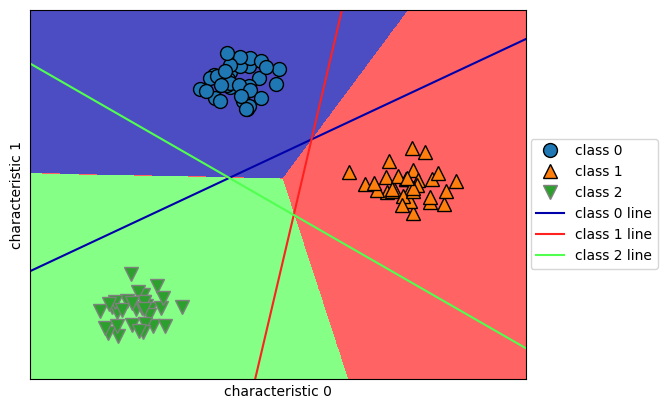

In [5]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill= True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1],c=color)
plt.xlabel("characteristic 0")
plt.ylabel("characteristic 1")
plt.legend(['class 0','class 1','class 2','class 0 line','class 1 line','class 2 line'], loc=(1.01,0.3))

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)

/home/ai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
logreg= LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

/home/ai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

/home/ai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


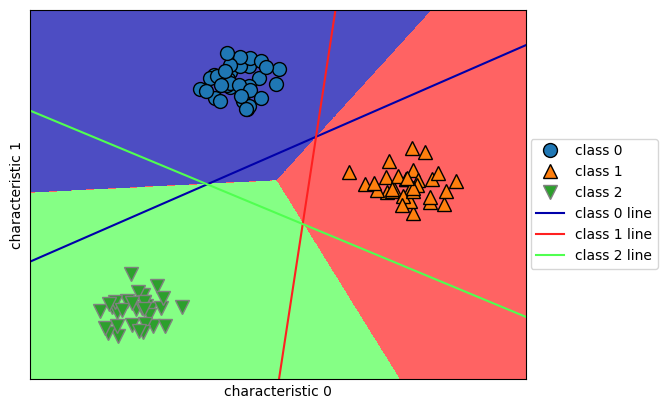

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_c = SGDClassifier(alpha = 0.01, learning_rate='adaptive',eta0=0.1,random_state=42,n_jobs=-1)
sgd_c.fit(X,y)
mglearn.plots.plot_2d_classification(sgd_c,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1],c=color)
plt.xlabel("characteristic 0")
plt.ylabel("characteristic 1")
plt.legend(['class 0','class 1','class 2','class 0 line','class 1 line','class 2 line'], loc=(1.01,0.3))
plt.xlabel("characteristic 0")
plt.ylabel("characteristic 1")
plt.show()

In [10]:
from sklearn.linear_model import SGDRegressor
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
sgd_r = SGDRegressor(learning_rate='adaptive', eta0=0.1, random_state=42)
sgd_r.fit(X_train, y_train)
print("training set score: {:.2f}".format(sgd_r.score(X_train,y_train)))
print("test set score: {:.2f}".format(sgd_r.score(X_test,y_test)))

training set score: 0.91
test set score: 0.77


/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [25]:
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y=np.array([0,1,0,1])


In [26]:
count = {}
for label in np.unique(y):
    counts[label] = X[y==label].sum(axis = 0)
print("count:\n{}".format(counts))

count:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [27]:
counts={}
for label in np.unique(y):
    counts[label] = X[y==label].sum(axis=0)
print("count:\n",counts)

count:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
